In [1]:
import fnmatch
import os
import numpy as np
from numpy import linalg as LA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget
from scipy import stats
#from mayavi import mlab
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from latexify import latexify
latexify()

# Defind func and manually centering data

In [2]:
############ Load the atom positions and spin directions.(only read limited some atoms in order in the filed)
###############################################################

###Ｒｅａｄ　ｏｎｅ　ｆｉｌｅ
fpath1= r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mk_spins_01.txt'

nbatom=16 #no of atoms to read in the file
atpos=np.zeros([16,3]) #store atom positons in a unit cell
allpos=np.zeros([nbatom,3])#store atom positons in a super cell
spins =np.zeros([nbatom,3])#store spins in a super cell

#read data
with open(fpath1, 'r') as f:
    i=0
    for line in f:
        line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
        if line[0]=="SITE":
            atpos[i,:]=line[1:]#automatically convert string to np.array
            i=i+1
            
with open(fpath1, 'r') as f:
    i=0        
    for line in f:        
        line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
        if line[0]=="SPIN":
            allpos[i,:]=np.array(line[2:5],dtype='f8')+atpos[int(line[1])-1,:]
            spins[i,:]=line[5:8]
            i=i+1
            if i==nbatom:
                break

In [3]:
print(spins.shape)
print(spins)
spins_f = spins.flatten('F').reshape(48,1)
ss = spins_f@spins_f.T
print(ss)

(16, 3)
[[ 0.01843025  0.98154976  0.19031656]
 [-0.18329589  0.98290361 -0.01741004]
 [ 0.92037235  0.33418125  0.2030705 ]
 [-0.66074174 -0.24203869  0.71051926]
 [ 0.2288428   0.91240868 -0.33932489]
 [ 0.18866825 -0.97823082 -0.08642191]
 [ 0.42110202 -0.57811323  0.69889783]
 [ 0.49509006 -0.45206709  0.74197115]
 [-0.65647544 -0.58609409  0.4749039 ]
 [ 0.05054538 -0.97795449 -0.20260844]
 [ 0.75085629 -0.66044827 -0.004787  ]
 [ 0.80891677 -0.18414836 -0.55833954]
 [-0.37626407  0.84810539  0.37301823]
 [ 0.45652352 -0.83905601 -0.29592445]
 [-0.563457    0.27643586 -0.77852388]
 [-0.70456004  0.65559277  0.27164915]]
[[ 3.39674299e-04 -3.37819007e-03  1.69626971e-02 ... -5.45396312e-03
  -1.43483936e-02  5.00656311e-03]
 [-3.37819007e-03  3.35973849e-02 -1.68700473e-01 ...  5.42417372e-02
   1.42700230e-01 -4.97921740e-02]
 [ 1.69626971e-02 -1.68700473e-01  8.47085267e-01 ... -2.72360685e-01
  -7.16531852e-01  2.50018368e-01]
 ...
 [-5.45396312e-03  5.42417372e-02 -2.72360685e-

In [4]:
pca = PCA(n_components=5)
pca.fit(ss)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[1.00000000e+00 1.95615592e-31 1.23323266e-31 1.18799061e-31
 9.12808096e-32]
[1.59553643e+01 7.05681057e-15 5.60311110e-15 5.49937367e-15
 4.82054861e-15]


In [5]:
######load spin configuration files
temp = np.zeros([6*6*6*16, 3])
spins=np.zeros([5, 6*6*6*16*3])

temp = np.zeros([4*4*4*16, 3])
spins=np.zeros([50, 4*4*4*16*3])

filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7/'
#filepath=r'D:\9_Program files\SpinVert\gdhfo_d7\35mK_easy_plane/'
filename='35mk_spins_*.txt'

ii=0 #index for different files
for file in os.listdir(filepath):
    if fnmatch.fnmatch(file, filename):      
        print(file)
        row = 0
        with open(os.path.join(filepath,file), 'r') as f:     
            for line in f:#get the atom positions in the supercell        
                line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
                if line[0]=="SPIN":                  
                    temp[row,:] = line[5:8]     
                    row += 1
        #print((temp**2).sum(axis=1))
        spins[ii,:] = temp.flatten('F')
        ii=ii+1

35mk_spins_01.txt
35mk_spins_02.txt
35mk_spins_03.txt
35mk_spins_04.txt
35mk_spins_05.txt
35mk_spins_06.txt
35mk_spins_07.txt
35mk_spins_08.txt
35mk_spins_09.txt
35mk_spins_10.txt
35mk_spins_11.txt
35mk_spins_12.txt
35mk_spins_13.txt
35mk_spins_14.txt
35mk_spins_15.txt
35mk_spins_16.txt
35mk_spins_17.txt
35mk_spins_18.txt
35mk_spins_19.txt
35mk_spins_20.txt
35mk_spins_21.txt
35mk_spins_22.txt
35mk_spins_23.txt
35mk_spins_24.txt
35mk_spins_25.txt
35mk_spins_26.txt
35mk_spins_27.txt
35mk_spins_28.txt
35mk_spins_29.txt
35mk_spins_30.txt
35mk_spins_31.txt
35mk_spins_32.txt
35mk_spins_33.txt
35mk_spins_34.txt
35mk_spins_35.txt
35mk_spins_36.txt
35mk_spins_37.txt
35mk_spins_38.txt
35mk_spins_39.txt
35mk_spins_40.txt
35mk_spins_41.txt
35mk_spins_42.txt
35mk_spins_43.txt
35mk_spins_44.txt
35mk_spins_45.txt
35mk_spins_46.txt
35mk_spins_47.txt
35mk_spins_48.txt
35mk_spins_49.txt
35mk_spins_50.txt


In [6]:
##### First load data: poss[ibox,cell_idx 1:3, idx_atom 1:16, xyz 1:3]
##############################################
import numpy as np
import fnmatch
import os

######load spin configuration files
temp = np.zeros([6*6*6*16, 3])
spins=np.zeros([5, 6*6*6*16*3])

temp = np.zeros([4*4*4*16, 3])
spins=np.zeros([50, 4*4*4*16*3])

filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7/'
#filepath=r'D:\9_Program files\SpinVert\gdhfo_d7\35mK_easy_plane/'
filename='35mk_spins_*.txt'

ii=0 #index for different files
for file in os.listdir(filepath):
    if fnmatch.fnmatch(file, filename):      
        print(file)
        row = 0
        with open(os.path.join(filepath,file), 'r') as f:     
            for line in f:#get the atom positions in the supercell        
                line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
                if line[0]=="SPIN":                  
                    temp[row,:] = line[5:8]     
                    row += 1
        #print((temp**2).sum(axis=1))
        spins[ii,:] = temp.flatten('F')  
        ii=ii+1

35mk_spins_01.txt
35mk_spins_02.txt
35mk_spins_03.txt
35mk_spins_04.txt
35mk_spins_05.txt
35mk_spins_06.txt
35mk_spins_07.txt
35mk_spins_08.txt
35mk_spins_09.txt
35mk_spins_10.txt
35mk_spins_11.txt
35mk_spins_12.txt
35mk_spins_13.txt
35mk_spins_14.txt
35mk_spins_15.txt
35mk_spins_16.txt
35mk_spins_17.txt
35mk_spins_18.txt
35mk_spins_19.txt
35mk_spins_20.txt
35mk_spins_21.txt
35mk_spins_22.txt
35mk_spins_23.txt
35mk_spins_24.txt
35mk_spins_25.txt
35mk_spins_26.txt
35mk_spins_27.txt
35mk_spins_28.txt
35mk_spins_29.txt
35mk_spins_30.txt
35mk_spins_31.txt
35mk_spins_32.txt
35mk_spins_33.txt
35mk_spins_34.txt
35mk_spins_35.txt
35mk_spins_36.txt
35mk_spins_37.txt
35mk_spins_38.txt
35mk_spins_39.txt
35mk_spins_40.txt
35mk_spins_41.txt
35mk_spins_42.txt
35mk_spins_43.txt
35mk_spins_44.txt
35mk_spins_45.txt
35mk_spins_46.txt
35mk_spins_47.txt
35mk_spins_48.txt
35mk_spins_49.txt
35mk_spins_50.txt


## Plot spins directions

In [7]:
from scipy import stats
from mayavi import mlab
xyz = spins[0,:].reshape([3,-1])
xyz = np.moveaxis(spins.reshape([10,3,-1]),1,0).reshape([3,-1])
#print((xyz**2).sum(axis=0)) # test if reshape correctly

x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
mlab.axes()
mlab.show()

ModuleNotFoundError: No module named 'mayavi'

In [60]:
print(color.shape,density.max(),density.min())

(1, 51200, 4) 0.30560633969141277 0.19509097273173717


In [7]:
#xyz = spins[0,:].reshape([3,-1])
xyz = np.moveaxis(spins.reshape([50,3,-1]),1,0).reshape([3,-1])

kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
# density = kde(xyz).reshape([1,-1])

from matplotlib import cm
cmap = cm.jet
color= cmap( (density-density.min()) / density.ptp() )

x, y, z = np.vsplit(xyz,3)
fig = ipv.figure()
ipv.scatter(x, y, z,marker='sphere',color=color[...,:3])
ipv.show()

NameError: name 'density' is not defined

In [109]:
pca = PCA(n_components=4)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_reduced = pca.transform(X)


[0.32322893 0.30936752 0.3021548  0.06524874]
[59.5218252  58.23156841 57.54874754 26.74282002]


In [44]:
print(X_reduced.shape)

(5, 5)


In [64]:
fig, axes = plt.subplots(4,3)

colors = np.arange(5)
idx = np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
for i, ax in enumerate(axes.flat[:10]):
    ax.scatter(X_reduced[:, idx[i,0]], X_reduced[:, idx[i,1]], cmap=plt.cm.Set1, edgecolor='k', s=40)
    #ax.scatter(X_reduced[idx[i,0],:], X_reduced[idx[i,1],:], cmap=plt.cm.Set1, edgecolor='k', s=40)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Loading data and organizing

## spins: (nb of files) X 3*(total nb of spins in the supercell)

In [ ]:
## spins is m by 3*N (m: No of files, N: total nb of spins in the supercell)
#every row is {S1x,S2x....Snx, S1y,S2y...Sny, S1z,S2z...Snz}

In [3]:
######load spin configuration files
nb_of_file_to_load = 10
nbatom=16 #no of atoms to read in the file
sc = 6 #super_cell_dim
temp = np.zeros([sc*sc*sc*nbatom, 3])

spins=np.zeros([nb_of_file_to_load, sc*sc*sc*nbatom*3])

filepath= r'D:\2_neutron_scattering\0_SpinVert\0_spinvert_program\spinvert_with_modifed\examples\spinice'
filename='spinice_spins_*.txt'

ii=0 #index for different files
for file in os.listdir(filepath):
    if fnmatch.fnmatch(file, filename):      
        print(file)
        row = 0
        with open(os.path.join(filepath,file), 'r') as f:     
            for line in f:#get the atom positions in the supercell        
                line=line.rstrip('\n').split()# without giving delimenter, it will treat conseutive space as one
                if line[0]=="SPIN":                  
                    temp[row,:] = line[5:8]     
                    row += 1
        spins[ii,:] = temp.flatten('F')  
        ii=ii+1   
        if ii == nb_of_file_to_load: # control nb of files to load
            break

spinice_spins_01.txt
spinice_spins_02.txt
spinice_spins_03.txt
spinice_spins_04.txt
spinice_spins_05.txt
spinice_spins_06.txt
spinice_spins_07.txt
spinice_spins_08.txt
spinice_spins_09.txt
spinice_spins_10.txt


In [15]:
print(spins)

[[-0.57735027 -0.57735027  0.57735027 ... -0.57735027  0.57735027
   0.57735027]
 [-0.57735027  0.57735027 -0.57735027 ...  0.57735027  0.57735027
  -0.57735027]
 [ 0.57735027 -0.57735027  0.57735027 ... -0.57735027 -0.57735027
  -0.57735027]
 ...
 [ 0.57735027  0.57735027 -0.57735027 ... -0.57735027  0.57735027
  -0.57735027]
 [ 0.57735027 -0.57735027 -0.57735027 ... -0.57735027  0.57735027
  -0.57735027]
 [ 0.57735027  0.57735027 -0.57735027 ...  0.57735027  0.57735027
   0.57735027]]


### Plot spin directions

In [ ]:
# using Mayavi
xyz = spins[0,:].reshape([3,-1])
xyz = np.moveaxis(spins.reshape([nb_of_file_to_load,3,-1]),1,0).reshape([3,-1])
print((xyz**2).sum(axis=0)) # check if the reshaping is correcting

x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
mlab.axes()
mlab.show()

## spins: n_clusters(unit cell) by 3*(No of spin in the cluster): 1 Cluster/U. Cell

In [47]:
## Cluster is a unit cell
# spins: n_clusters by 3*(No of spin in the cluster)
# eg.: a cluster is a tetradera
# a row: {S1x,S2x,S3x,S4x,S1y,S2y,S3y,S4y,S1z,S2z,S3z,S4z}

In [25]:
######load spin configuration files              
def load_1file_to_uc(file, sc, nbatom):
    """
    file: *_spins.txt file roduced by SPINVERT
    sc: one dimension of the super cell assuming the  supercell is (sc,sc,sc)
    nbatom: nb of spins per unit cell
    """
    temp = np.zeros([nbatom, 3]) 
    spins=np.zeros([sc*sc*sc, nbatom*3]) # sc**3 unit cells, nbatom*3 spin components per unit cell
    
    ii = 0
    idx = 0
    with open(file, 'r') as f:     
        for line in f:      
            line = line.rstrip('\n').split() # without giving delimenter, it will treat conseutive space as one
            if line[0]=="SPIN": 
                temp[idx,:] = line[5:8]
                idx += 1
                if np.remainder(idx, nbatom) == 0:
                    spins[ii,:] = temp.flatten('F') # convert to xxxxyyyyzzzz
                    idx = 0
                    ii += 1
    return spins

def load_all_to_uc(file_folder, file_name_pattern, sc, nbatom):
    i = 0
    for file in os.listdir(file_folder):
        if fnmatch.fnmatch(file, file_name_pattern):      
            print(file)
            temp = load_1file_to_uc(os.path.join(file_folder,file), sc=sc, nbatom=nbatom)
            if i == 0:
                spins = temp
                i = 1
            else:
                spins = np.vstack([spins, temp])
    return spins

In [70]:
filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7/35mK'
filename='35mk_spins_*.txt'
sc = 6

# filepath = r'D:\9_Program files\SpinVert\gdzro_ill\gd_ill_60mk-20k_with_paramag/' #fit with no disorder
# filename = '10k_0p994_s3_wl2p41_p3500i_spins_*.txt'
# sc = 6

#filepath = r'D:\9_Program files\SpinVert\GGG/' #fit with no disorder
#filename = 'ggg_spins_*.txt'
#sc = 6

spins = load_all_to_uc(filepath, filename, sc=sc, nbatom=16)

35mk_spins_01.txt
35mk_spins_02.txt
35mk_spins_03.txt
35mk_spins_04.txt
35mk_spins_05.txt
35mk_spins_06.txt
35mk_spins_07.txt
35mk_spins_08.txt
35mk_spins_09.txt
35mk_spins_10.txt
35mk_spins_11.txt
35mk_spins_12.txt
35mk_spins_13.txt
35mk_spins_14.txt
35mk_spins_15.txt
35mk_spins_16.txt
35mk_spins_17.txt
35mk_spins_18.txt
35mk_spins_19.txt
35mk_spins_20.txt
35mk_spins_21.txt
35mk_spins_22.txt
35mk_spins_23.txt
35mk_spins_24.txt
35mk_spins_25.txt
35mk_spins_26.txt
35mk_spins_27.txt
35mk_spins_28.txt
35mk_spins_29.txt
35mk_spins_30.txt
35mk_spins_31.txt
35mk_spins_32.txt
35mk_spins_33.txt
35mk_spins_34.txt
35mk_spins_35.txt
35mk_spins_36.txt
35mk_spins_37.txt
35mk_spins_38.txt
35mk_spins_39.txt
35mk_spins_40.txt


In [72]:
print(6**3*40, 16*3, spins.shape)

8640 48 (8640, 48)


In [73]:
np.savetxt('D:/Downloads/test1.txt',spins)

## spins: n_clusters(tetrhedra) by 3*(No of spin in the cluster): 8 clusters/unit cell

In [2]:
atpos = np.array([
    [0.5,  0.5,  0.5 ],
    [0.5,  0.,   0.  ],
    [0.,   0.,   0.5 ],
    [0.,   0.5,  0.  ],
    [0.5,  0.75, 0.75],
    [0.5,  0.25, 0.25],
    [0.,   0.25, 0.75],
    [0.,   0.75, 0.25],
    [0.75, 0.5,  0.75],
    [0.75, 0.,   0.25],
    [0.25, 0.,   0.75],
    [0.25, 0.5,  0.25],
    [0.75, 0.25, 0.  ],
    [0.75, 0.75, 0.5 ],
    [0.25, 0.75, 0.  ],
    [0.25, 0.25, 0.5 ]])

aniso = np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],
                  [1,-1,-1],[1,-1,-1],[1,-1,-1],[1,-1,-1],
                  [-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],
                  [-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1]])/np.sqrt(3.)

# Diamond lattic: center of the tetrahedra (5) + and three from O+0.25[111] (first 4: type A, last 4: type B)
o8b = np.array([ [ 0.625,  0.625,  0.625],
                 [ 0.625,  0.125,  0.125],
                 [ 0.125,  0.125,  0.625],
                 [ 0.125,  0.625,  0.125],
                 [ 0.375,  0.375,  0.375],
                 [ 0.375,  0.875,  0.875],
                 [ 0.875,  0.375,  0.875],
                 [ 0.875,  0.875,  0.375]])

## Find the R-ion neighbors of oxygen ions on the first unit cell
# create a 333 supercell and search neighbor for the O ions in the centeral cell
import itertools
permu=np.array(list(itertools.product([0,1,-1], repeat=3) ) )
pos_sc333 = np.vstack([atpos+item for item in permu])

orBondsIdx = np.zeros([32,2],dtype=int) #store the 32 R-O(8b) bonds in the unitCell: idx(O8b),idx(R),
orBonds = np.zeros([32,8]) #store the 32 R-O(8b) bonds in the unit cell: idx(O8b),idx(R), dL, pos[R]-pos[O8b]
idx = 0
for i in np.arange(0,len(o8b),1):
    for ii in np.arange(0,len(pos_sc333),1):
        distance = LA.norm(o8b[i]-pos_sc333[ii])
        if distance==np.sqrt(3/64.):
            ridx = np.remainder(ii,16)
            orBondsIdx[idx,:] = [i*1., ridx]
            orBonds[idx,:]=np.hstack( [ [i,ridx], np.trunc(pos_sc333[ii]), pos_sc333[ii]-o8b[i] ] )
            idx +=  1

#print(orBondsIdx)                 
orBonds[20:,:] = orBonds[[23,20,22,21, 27,26,24,25, 31,30,29,28],:] # make tetrahedron type B have the same order for the vertices!!! It matters for PCA
print(orBonds)

def load_1file_to_tetra(file, sc, nbatoms, tetra_uc, t_type='All', out_part = False):
    """
    file: *_spins.txt file produced by SPINVERT
    sc: one dimension of the super cell assuming the  supercell is (sc,sc,sc)
    nbatom: nb of spins per unit cell
    """
    temp = np.zeros([nbatoms, 3]) 
    spins_sc=np.zeros([sc,sc,sc,nbatoms,3]) # all spin in unit cell
    
    if t_type == 'All': # :16, 16:, 20: (different optoins: only Tpye A tetra, only tpye B, only the last three type B)
        tetra_uc = tetra_uc[:,:]
    elif t_type == 'A':
        tetra_uc = tetra_uc[:16,:]
    elif t_type == 'B':
        tetra_uc = tetra_uc[16:,:]
    else:
        tetra_uc = tetra_uc[:,:]
    
    with open(file, 'r') as f:
        for line in f:
            line=line.rstrip('\n').split() # without giving delimenter, it will treat conseutive space as one
            if line[0]=="SPIN":
                idx_uc=np.array(line[1:5],dtype='int32')# atom index, uniteCell idx:[i,j,k]
                sxyz = np.array(line[5:8],dtype='float') # spin orientatoins
                spins_sc[idx_uc[1],idx_uc[2],idx_uc[3],idx_uc[0]-1,:]= sxyz
    
    # With removing the tetrahedron on the boundary of the supercell (not periodic boundary condistions)
    tetra = np.tile(tetra_uc[:,1:5],(sc**3,1)).astype(int)
    permu=np.array(list(itertools.product(np.arange(sc), repeat=3))) # has the same order as in the spins files by spinvert
    tetra[:,1:4] = tetra[:,1:4] + np.repeat(permu, tetra_uc.shape[0],axis=0)
    
    #tetra[:,1:4] = np.where(tetra[:,1:4]>=sc, tetra[:,1:4]-sc, tetra[:,1:4]) # periodic bundary conditions
    mask = np.any(tetra[:,1:4].reshape(-1,12)==int(sc), axis=1)
    tetra = np.reshape(tetra.reshape(-1,16)[~mask,:],    (-1,4))
    
    spins_tetra = spins_sc[tetra[:,1],tetra[:,2],tetra[:,3],tetra[:,0],:]   
    
    # With removing the unit cells on the three x=sc[0], y=sc[1], z=sc[2] sufaces of the supercell
    # for having complet diamond supercell for spincorrel.f90
    if out_part:
        tetra = np.tile(tetra_uc[:,1:5],[(sc-1)**3,1]).astype(int)
        permu=np.array(list(itertools.product(np.arange(sc-1), repeat=3))) # has the same order as in the spins files by spinvert
        tetra[:,1:4] = tetra[:,1:4] + np.repeat(permu, tetra_uc.shape[0],axis=0)   
        spins_tetra_part = spins_sc[tetra[:,1],tetra[:,2],tetra[:,3],tetra[:,0],:]  
        return spins_tetra.reshape(-1,4,3).reshape(-1,12,order='F'), spins_tetra_part.reshape(-1,4,3).reshape(-1,12,order='F') # convert to xxxxyyyyzzzz
    else:
        return spins_tetra.reshape(-1,4,3).reshape(-1,12,order='F')

def calc_diamond_sites(tetra_uc, sc=5, t_type='All', out_part=False):
    # diamond sites for the genergated "spins" with every row for a tetrahedron (row corresponds to row)
    permu=np.array(list( itertools.product(np.arange(sc), repeat=3) )) # has the same order as in the spins files by spinvert
    
    if t_type == 'All': # :16, 16:, 20: (different optoins: only Tpye A tetra, only tpye B, only the last three type B)
        tetra_uc = tetra_uc[:,:]
    elif t_type == 'A':
        tetra_uc = tetra_uc[:16,:]
    elif t_type == 'B':
        tetra_uc = tetra_uc[16:,:]
    else:
        tetra_uc = tetra_uc[:,:]
    
    # With removing the tetrahedron on the boundary of the supercell (not periodic boundary condistions)
    tetra = np.tile(tetra_uc[:,1:5],(sc*sc*sc,1)).astype(int)
    tetra[:,1:4] = tetra[:,1:4] + np.repeat(permu,tetra_uc.shape[0],axis=0)   
    #tetra[:,1:4] = np.where(tetra[:,1:4]>=sc, tetra[:,1:4]-sc, tetra[:,1:4]) # periodic bundary conditions
    mask = np.any(tetra[:,1:4].reshape(-1,12)==int(sc), axis=1)
    
    diamond_uc = np.hstack([tetra_uc[:,0].reshape([-1,1]), np.zeros([32,3])])
    diamond = np.tile(diamond_uc, (sc*sc*sc,1)).astype(int)
    diamond[:,1:4] = diamond[:,1:4] + np.repeat(permu,diamond_uc.shape[0],axis=0)
    diamond = np.reshape(diamond.reshape(-1,16)[~mask,:],    (-1,4))
    
    # With removing the unit cells on the three x=sc[0], y=sc[1], z=sc[2] sufaces of the supercell for having complet diamond supercell    
    if out_part:
        diamond_uc = np.hstack([np.arange(8).reshape([8,1]), np.zeros([8,3])])
        diamond_part = np.tile(diamond_uc, [(sc-1)**3,1]).astype(int)
        permu=np.array(list(itertools.product(np.arange(sc-1), repeat=3))) # has the same order as in the spins files by spinvert
        diamond_part[:,1:4] = diamond_part[:,1:4] + np.repeat(permu,8,axis=0)
        return diamond[::4,:], diamond_part
    else:
        return diamond[::4,:]

def calc_diamond_sites_nSC(tetra_uc, sc=6, t_type='All', nSC=1, out_part=False):
    if out_part:
        diamond, diamond_part = calc_diamond_sites(tetra_uc, sc=sc, t_type=t_type, out_part=out_part)
        diamond, diamond_part = np.tile(diamond,[nSC,1]), np.tile(diamond_part,[nSC,1])
        return diamond, diamond_part
    else: 
        return diamond
    
def load_all_to_tetra(file_folder, file_name_pattern, sc, nbatoms, tetra_uc, t_type='All', out_part=False):
    i = 0
    for file in os.listdir(file_folder):
        if fnmatch.fnmatch(file, file_name_pattern):      
            print(file)
            if out_part:
                temp0, temp1 = load_1file_to_tetra(os.path.join(file_folder,file), sc=sc, nbatoms=nbatoms, tetra_uc=tetra_uc, t_type=t_type, out_part=True)
                if i == 0:
                    spins = temp0
                    spins_part = temp1
                    i = 1
                else:
                    spins = np.vstack([spins, temp0])
                    spins_part = np.vstack([spins_part, temp1])
            else:
                temp = load_1file_to_tetra(os.path.join(file_folder,file), sc=sc, nbatoms=nbatoms, tetra_uc=tetra_uc, t_type=t_type, out_part=False)
                if i == 0:
                    spins = temp
                    i = 1
                else:
                    spins = np.vstack([spins, temp])
    if out_part:
        return spins, spins_part
    else:
        return spins
    
def save_spins(file, ihklS, nSites=8, X_Sites=o8b, cell=[10.44,10.44,10.44, 90,90,90], box=[6,6,6]):
    """
    ihklS: box[0]*box[1]*box[2]*nSites    by    7: rwo at_idx, h, k, l, sx, sy, sz
    """    
    # Save super lattice
    f = open(file, 'w+') # append
    f.write('TITLE spin \n')
    f.write('CELL ' + ' '.join(map(str, cell)) + '\n')
    
    names  = np.repeat('SITE', nSites)
    outputs = map(lambda x: "%s  %f %f %f " % (x[0],x[1][0],x[1][1],x[1][2]),
                  zip(names, X_Sites)) 
    data = '\n'.join(outputs)+'\n' # Concat all strings in list, separated by line break
    f.write(data)

    f.write('BOX ' + ' '.join(map(str, box)) + '\n')
    f.write('FORM_FACTOR_J0 0 0 0\nPROPOSED_MOVES 0\nACCEPTED_MOVES 0\nWEIGHT 3\nCHI_SQUARED 14\nR_FACTOR 3.4\nSCALE 72\nFLAT_BACKGROUND 0.0\nLINEAR_BACKGROUND 0\n')

    names  = np.repeat('SPIN',8*np.prod(box)).astype('str')
    outputs = map(lambda x: "%s %i %i %i %i %f %f %f " % (x[0],x[1][0],x[1][1],x[1][2],x[1][3],x[1][4],x[1][5],x[1][6]),
                  zip(names, ihklS)) 
    data = '\n'.join(outputs) # Concat all strings in list, separated by line break
    f.write(data)
    f.close()
    print('Saved ' + file)

[[ 0.     0.     0.     0.     0.    -0.125 -0.125 -0.125]
 [ 0.     4.     0.     0.     0.    -0.125  0.125  0.125]
 [ 0.     8.     0.     0.     0.     0.125 -0.125  0.125]
 [ 0.    13.     0.     0.     0.     0.125  0.125 -0.125]
 [ 1.     1.     0.     0.     0.    -0.125 -0.125 -0.125]
 [ 1.     5.     0.     0.     0.    -0.125  0.125  0.125]
 [ 1.     9.     0.     0.     0.     0.125 -0.125  0.125]
 [ 1.    12.     0.     0.     0.     0.125  0.125 -0.125]
 [ 2.     2.     0.     0.     0.    -0.125 -0.125 -0.125]
 [ 2.     6.     0.     0.     0.    -0.125  0.125  0.125]
 [ 2.    10.     0.     0.     0.     0.125 -0.125  0.125]
 [ 2.    15.     0.     0.     0.     0.125  0.125 -0.125]
 [ 3.     3.     0.     0.     0.    -0.125 -0.125 -0.125]
 [ 3.     7.     0.     0.     0.    -0.125  0.125  0.125]
 [ 3.    11.     0.     0.     0.     0.125 -0.125  0.125]
 [ 3.    14.     0.     0.     0.     0.125  0.125 -0.125]
 [ 4.     0.     0.     0.     0.     0.125  0.125  0.12

In [10]:
filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/'
filename='35mk_spins_01.txt'
sc = 6
spins, spins_part = load_1file_to_tetra(os.path.join(filepath,filename), sc=sc, nbatoms=16, tetra_uc = orBonds, t_type='All', out_part=True)
print(spins.shape, spins_part.shape)

(1530, 12) (1000, 12)


In [10]:
sc = 6
diamond, diamond_part = calc_diamond_sites(tetra_uc=orBonds, sc=sc, out_part=True)
print(diamond.shape,8*27, diamond_part.shape, 8*8)
#print(diamond_part)

sc = 6
nSC = 40
diamond, diamond_part = calc_diamond_sites_nSC(tetra_uc=orBonds, sc=sc, nSC=nSC, out_part=True)
print(diamond.shape,diamond_part.shape)

(1530, 4) 216 (1000, 4) 64
(61200, 4) (40000, 4)


In [3]:
filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/'
filename='35mk_spins_*.txt'
sc = 6

# filepath=r'D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\1K/Old'
# filename='1K_spins_*.txt'
# sc = 4

#filepath = r'D:\2_Neutron_scattering\0_SpinVert\gdzro_ill\gd_ill_60mk-20k_with_paramag/' #fit with no disorder
#filename = '10k_0p994_s3_wl2p41_p3500i_spins_*.txt'
#sc = 6

# filepath = r'D:\2_Neutron_scattering\0_SpinVert\0_spinvert_program\spinvert_with_modifed\examples\spinice/'
# filename = 'spinice_spins*.txt'
# sc = 6

spins, spins_part = load_all_to_tetra(filepath,filename, sc=sc, nbatoms=16, tetra_uc = orBonds, 
                                      t_type='All', out_part=True)
print(spins.shape, spins_part.shape)

35mk_spins_01.txt
35mk_spins_02.txt
35mk_spins_03.txt
35mk_spins_04.txt
35mk_spins_05.txt
35mk_spins_06.txt
35mk_spins_07.txt
35mk_spins_08.txt
35mk_spins_09.txt
35mk_spins_10.txt
35mk_spins_11.txt
35mk_spins_12.txt
35mk_spins_13.txt
35mk_spins_14.txt
35mk_spins_15.txt
35mk_spins_16.txt
35mk_spins_17.txt
35mk_spins_18.txt
35mk_spins_19.txt
35mk_spins_20.txt
35mk_spins_21.txt
35mk_spins_22.txt
35mk_spins_23.txt
35mk_spins_24.txt
35mk_spins_25.txt
35mk_spins_26.txt
35mk_spins_27.txt
35mk_spins_28.txt
35mk_spins_29.txt
35mk_spins_30.txt
35mk_spins_31.txt
35mk_spins_32.txt
35mk_spins_33.txt
35mk_spins_34.txt
35mk_spins_35.txt
35mk_spins_36.txt
35mk_spins_37.txt
35mk_spins_38.txt
35mk_spins_39.txt
35mk_spins_40.txt
35mk_spins_41.txt
35mk_spins_42.txt
35mk_spins_43.txt
35mk_spins_44.txt
35mk_spins_45.txt
35mk_spins_46.txt
35mk_spins_47.txt
35mk_spins_48.txt
35mk_spins_49.txt
35mk_spins_50.txt
(76500, 12) (50000, 12)


## spins: n_clusters(tetrhedra) by 3*(No of spin in the cluster): 5 clusters/unit cell

In [9]:
## Cluster is a tetrahedron
def load_1file_to_tetra(file, sc, nbatom):
    """
    file: *_spins.txt file roduced by SPINVERT
    sc: one dimension of the super cell assuming the  supercell is (sc,sc,sc)
    nbatom: nb of spins per unit cell
    """
    temp = np.zeros([nbatom, 3]) 
    spins=np.zeros([sc*sc*sc*5, 4*3]) # 5 tedrahedra per unit cell, 4 spins per tetrhedron, 3 components per spin
    
    tetra = np.array([[0,4,8,13],
                      [1,5,9,12],
                      [2,6,10,15],
                      [3,7,11,14],
                      [0,5,11,15]]) 

    ii = 0
    idx = 0
    with open(file, 'r') as f:     
        for line in f:      
            line = line.rstrip('\n').split() # without giving delimenter, it will treat conseutive space as one
            if line[0]=="SPIN": 
                temp[idx,:] = line[5:8]
                idx += 1
                if np.remainder(idx, 16) == 0:
                    #print(np.squeeze(temp[tetra,:].reshape(5,1,12,order='F')))
                    spins[ii:ii+5,:] = np.squeeze(temp[tetra,:].reshape(5,-1,12,order='F'))
                    idx = 0
                    ii += 5
    return spins
# def load_1file_to_tetra(file, sc, nbatom): # only 4 tetrahedra included
#     """
#     file: *_spins.txt file roduced by SPINVERT
#     sc: one dimension of the super cell assuming the  supercell is (sc,sc,sc)
#     nbatom: nb of spins per unit cell
#     """
#     temp = np.zeros([nbatom, 3]) 
#     spins=np.zeros([sc*sc*sc*4, 4*3]) # 5 tedrahedra per unit cell, 4 spins per tetrhedron, 3 components per spin
    
#     tetra = np.array([[0,4,8,13],
#                       [1,5,9,12],
#                       [2,6,10,15],
#                       [3,7,11,14]]) 

#     ii = 0
#     idx = 0
#     with open(file, 'r') as f:     
#         for line in f:      
#             line = line.rstrip('\n').split() # without giving delimenter, it will treat conseutive space as one
#             if line[0]=="SPIN": 
#                 temp[idx,:] = line[5:8]
#                 idx += 1
#                 if np.remainder(idx, 16) == 0:
#                     #print(np.squeeze(temp[tetra,:].reshape(5,1,12,order='F')))
#                     spins[ii:ii+4,:] = np.squeeze(temp[tetra,:].reshape(4,-1,12,order='F'))
#                     idx = 0
#                     ii += 4
#     return spins

def load_all_to_tetra(file_folder, file_name_pattern, sc, nbatom):
    i = 0
    for file in os.listdir(file_folder):
        if fnmatch.fnmatch(file, file_name_pattern):      
            print(file)
            temp = load_1file_to_tetra(os.path.join(file_folder,file), sc=sc, nbatom=nbatom)
            if i == 0:
                spins = temp
                i = 1
            else:
                spins = np.vstack([spins, temp])
    return spins

In [8]:
filepath=r'D:\9_Program files\SpinVert\gdhfo_d7/'
filename='35mk_spins_*.txt'
sc = 4

#filepath=r'D:\9_Program files\SpinVert\gdhfo_d7\35mK_easy_plane'
#filename='35mk_spins_*.txt'
#sc = 4

#filepath = r'D:\9_Program files\SpinVert\gdzro_ill\gd_ill_60mk-20k_with_paramag/' #fit with no disorder
#filename = '10k_0p994_s3_wl2p41_p3500i_spins_*.txt'
#sc = 6

#filepath= r'D:\9_Program files\SpinVert\0_spinvert_program\spinvert_with_modifed\examples\spinice'
#filename='spinice_spins_*.txt'
#sc = 6

spins = load_all_to_tetra(filepath, filename, sc=sc, nbatom=16)

TypeError: load_all_to_tetra() got an unexpected keyword argument 'nbatom'

In [35]:
print(6*6*6*5, spins.shape, spins,'\n', spins.reshape(-1,3,4))

1080 (5400, 12) [[ 0.76586347 -0.5649136  -0.32011059 ...  0.61422636 -0.89327463
   0.94440943]
 [ 0.48758376 -0.81354833  0.67849382 ...  0.40829173 -0.70046537
  -0.0010663 ]
 [ 0.01287093  0.73104373 -0.00506104 ...  0.27715643 -0.59988062
  -0.54290937]
 ...
 [ 0.8580966  -0.16440391 -0.47715303 ... -0.63052267  0.85254883
  -0.62861386]
 [-0.02699651 -0.76010892 -0.14544073 ... -0.62395     0.41420208
  -0.38285591]
 [-0.05134526  0.53675608 -0.14544073 ... -0.24393116  0.41420208
  -0.62861386]] 
 [[[ 0.76586347 -0.5649136  -0.32011059  0.06465196]
  [-0.09906493 -0.55099782  0.31557826  0.32235223]
  [-0.63532613  0.61422636 -0.89327463  0.94440943]]

 [[ 0.48758376 -0.81354833  0.67849382 -0.41572329]
  [-0.76611021 -0.4140495   0.2213468   0.90949052]
  [ 0.41873287  0.40829173 -0.70046537 -0.0010663 ]]

 [[ 0.01287093  0.73104373 -0.00506104 -0.767762  ]
  [-0.45593735 -0.62350572  0.80007352  0.34028067]
  [ 0.8899188   0.27715643 -0.59988062 -0.54290937]]

 ...

 [[ 0.8580

In [8]:
print(spins[0,:],spins[0,:].reshape([4,3],order='F'))

[-0.87661404 -0.52046253 -0.28289714  0.46404144  0.39827508  0.80135599
 -0.82415181 -0.7962185   0.27004587  0.29486833 -0.49065569  0.38820309] [[-0.87661404  0.39827508  0.27004587]
 [-0.52046253  0.80135599  0.29486833]
 [-0.28289714 -0.82415181 -0.49065569]
 [ 0.46404144 -0.7962185   0.38820309]]


In [117]:
rands = spins[np.random.randint(len(spins), size=1), :].reshape([4,3],order='F')
print(rands)
a = rands[0,:]@rands[2,:]
b = rands[1,:]@rands[3,:]
c = rands[0,:]@rands[2,:]
d = rands[1,:]@rands[3,:]
print(a,b,c,d, (a+b-c-d)/2)

[[ 0.93907174  0.07086631 -0.33633648]
 [-0.5307457  -0.27487415  0.80171891]
 [-0.6998747   0.58591625  0.40850648]
 [ 0.30032477 -0.40491271 -0.8636265 ]]
-0.7531064681779512 -0.740481738303564 -0.7531064681779512 -0.740481738303564 -5.551115123125783e-17


# Calculate local four spin correlation params

## Functions

In [109]:
# Functions calculating f1, f2 (Plumb, K. W. et.al. Nat. Phys. 15, 54-59 (2019))
def cal_f1f2_on_a_tetra(spins):
    f1 = (spins[0,:]+spins[1,:]) @ (spins[2,:]+spins[3,:]) - 2*spins[0,:]@spins[1,:] - 2*spins[2,:]@spins[3,:]
    f2 = spins[0,:]@spins[2,:] + spins[1,:]@spins[3,:] - spins[1,:]@spins[2,:] - spins[0,:]@spins[3,:]
    return f1/np.sqrt(12.), f2/2.

def cal_f1f2_all(spins):
    f1f2 = np.zeros([spins.shape[0], 2])
    for ind, spins_tetra in enumerate(spins):
        #print(np.array(cal_f1f2_on_a_tetra(spins_tetra.reshape((4,3), order='F'))))
        f1f2[ind,:] = np.array(cal_f1f2_on_a_tetra(spins_tetra.reshape((4,3), order='F')))
    return f1f2
# Functions calculating R and \tilde{R}, (Sadeghi, Azam et.al.,PRB 91, 140407(R) (2015)
def cal_RR_on_a_tetra(spins):
    R = (spins[0,:]@spins[1,:]) * (spins[2,:]@spins[3,:]) \
      + (spins[0,:]@spins[2,:]) * (spins[1,:]@spins[3,:]) \
      + (spins[0,:]@spins[3,:]) * (spins[1,:]@spins[2,:])
    R_ = np.abs(
        (spins[0,:]@spins[1,:]) * (spins[2,:]@spins[3,:])
      - (spins[0,:]@spins[2,:]) * (spins[1,:]@spins[3,:])
      + (spins[0,:]@spins[3,:]) * (spins[1,:]@spins[2,:])
               )
    return R, R_
def cal_RR_all(spins):
    RR = np.zeros([spins.shape[0], 2])
    for ind, spins_tetra in enumerate(spins):
        RR[ind,:] = np.array(cal_RR_on_a_tetra(spins_tetra.reshape((4,3), order='F')))
    return RR

def scatter_hist(x, y, ax, ax_histx, ax_histy, binsX=50, binsY=50):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    # ax.scatter(x, y)
    ax.hist2d(x,y, (binsX, binsY), cmap=plt.cm.get_cmap('Blues'), cmin=1)
    
    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    import scipy.stats as stats
    density = stats.gaussian_kde(x)
    n, x, _ = ax_histx.hist(x, bins=binsX,density=True)
    ax_histx.plot(x, density(x))
    
    density = stats.gaussian_kde(y)
    n, y, _ = ax_histy.hist(y, bins=binsY, orientation='horizontal',density=True)
    ax_histy.plot(density(y),y)

## F1 and F2

(2, 21400)


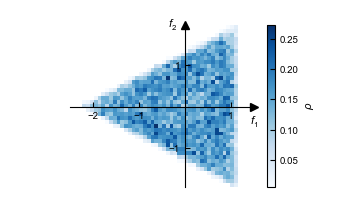

In [110]:
f1f2 = cal_f1f2_all(spins[:,:]).T
print(f1f2.shape)
# from scipy.stats import gaussian_kde
# z = gaussian_kde(f1f2)(f1f2)
#cm.PuBu_r
import matplotlib as mpl
fig = plt.figure()
plt.hist2d(f1f2[0,:], f1f2[1,:], (41, 41), density=True, cmap=plt.get_cmap('Blues'),cmin=0.0001,cmax=1) 
#plt.hist2d(f1f2[0,:], f1f2[1,:], (51, 51), norm=mpl.colors.LogNorm(),  density=True, cmap=plt.get_cmap('Blues')) 

ax = plt.gca()
ax.set_aspect(0.9)
ax.set_xlim([-2.5,1.5])
ax.set_xticks([-2,-1,1],minor=False)
ax.set_yticks([-1,1],minor=False)
## Changes axis
# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$',rotation='horizontal')

ax.yaxis.set_label_coords(0.56, 0.95)
ax.xaxis.set_label_coords(1., 0.45)

plt.colorbar(label=r'$\rho$')
#fig.savefig(os.path.join(filepath,'f1_f1.pdf'), bbox_inches="tight",pad_inches=0.01)
plt.show()
#import tikzplotlib
#tikzplotlib.save(os.path.join(filepath,'f1_f12.tex'))

# Figure with side PDF figures
# fig = plt.figure(figsize=(4, 4))
# gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
#                       left=0.1, right=0.9, bottom=0.1, top=0.9,
#                       wspace=0.05, hspace=0.05)

# ax = fig.add_subplot(gs[1, 0])
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
# ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# # use the previously defined function
# scatter_hist(f1f2[0,:], f1f2[1,:], ax, ax_histx, ax_histy,binsX=41,binsY=41)
# ax.set_xlabel(r'$f_1$')
# ax.set_ylabel(r'$f_2$')
# #ax_histx.text(0.7,0.7,r'Gd$_2$Zr$_2$O$_7$', transform =ax_histx.transAxes)
# ax_histx.text(0.3,0.7,r'Gd$_2$Hf$_2$O$_7$', transform =ax_histx.transAxes)

# plt.show()

## R and $\tilde{R}$

C:\Users\jhxup\AppData\Local\Temp\ipykernel_32292\2405352999.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



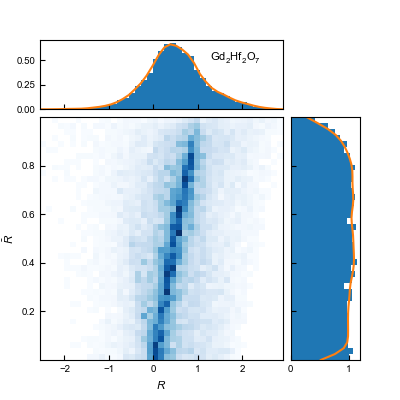

In [111]:
RR = cal_RR_all(spins[:,:]).T
# plt.figure()
# plt.hist2d(RR[0,:], RR[1,:], (50, 50), cmap=plt.cm.jet)
# plt.colorbar()
# plt.show()
   
# start with a square Figure
fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(RR[0,:], RR[1,:], ax, ax_histx, ax_histy,binsX=41,binsY=41)
ax.set_xlabel(r'$R$')
ax.set_ylabel(r'$\tilde{R}$')
#ax_histx.text(0.7,0.7,r'Gd$_2$Zr$_2$O$_7$', transform =ax_histx.transAxes)
ax_histx.text(0.7,0.7,r'Gd$_2$Hf$_2$O$_7$', transform =ax_histx.transAxes)

plt.show()
#plt.close()

In [25]:
plt.close('all')

# PCA

## Eigen values and vectors

(76500, 12)
explained_variance_ratio
 [0.19625293 0.19263773 0.19135988 0.06916823 0.06826572 0.06605382
 0.05973971 0.05943728 0.03754163 0.01999316 0.0198822  0.01966771] 
explained_variance_ratio
 1.0000000000000002
[-2.47603918e-03  2.18391761e-03  3.96719435e-04 -3.06230936e-03
  1.08329106e-05  1.23624581e-03  2.70970256e-03 -2.97057619e-04
  3.49199243e-03 -1.61527545e-05 -8.52291661e-04 -1.87760980e-03]


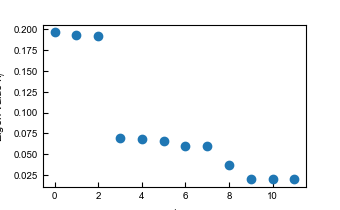

In [4]:
# PCA analyses on clusters
X = spins
print(X.shape)
n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X)

print('explained_variance_ratio\n', pca.explained_variance_ratio_,
      '\nexplained_variance_ratio\n', np.sum(pca.explained_variance_ratio_) )

#print(pca.singular_values_)

X_reduced = pca.transform(X)
comps = pca.components_
print(pca.mean_)

latexify()
plt.figure()
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'o')
plt.xticks(color='k')
plt.yticks(color='k')
plt.xlabel(r'$i$')
#plt.ylabel('Explained var ratio $\lambda_i$',size=14)
plt.ylabel('Eigen value $\lambda_i$')
#plt.savefig(filepath+'eigen.pdf',bbox_inches="tight", pad_inches=0.01)
plt.show()

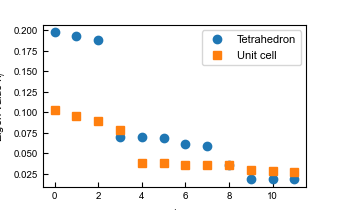

In [5]:
evr_uc = [0.10230173, 0.0960738,  0.08987914, 0.07832946, 0.0385016,  0.03773699,
          0.03589975, 0.03569953, 0.03540939, 0.02920924, 0.02895077, 0.02727236] # for uc
evr_tr = [0.19749813, 0.1934086,  0.18833777, 0.07023033, 0.06999731, 0.06840663, 
          0.06121119, 0.05949047, 0.03624167, 0.01862129, 0.01835295, 0.01820367] # for single tetrahedron

latexify()
plt.figure()
plt.plot(np.arange(12), evr_tr,'o', label='Tetrahedron')
plt.plot(np.arange(12), evr_uc,'s', label='Unit cell')
plt.xlabel(r'$i$')
plt.ylabel('Eigen value $\lambda_i$')
plt.legend()
#plt.savefig(filepath+'eigen_tr_uc.pdf',bbox_inches="tight", pad_inches=0.01)
plt.show()

In [37]:
# Principle components are perpendicular to each other
comps[0,:].dot(comps[3,:])

2.7755575615628914e-17

In [38]:
print(comps[3,:])

[-0.1651058   0.34198993 -0.39966402  0.30429784 -0.13109549 -0.44164786
  0.13528278  0.47380065  0.15052348 -0.06409178  0.14452755 -0.31744894]


(12, 12) (76500, 12) 
 [[[-0.08757401  0.08368573  0.40089782 -0.39885823]
  [ 0.03886899 -0.36626901 -0.03034562  0.3508978 ]
  [ 0.03446755  0.44360178 -0.45506344 -0.02744693]]

 [[ 0.02499693 -0.026635   -0.30641055  0.30676171]
  [ 0.39048391 -0.15478089 -0.43642774  0.16308242]
  [-0.40344359  0.13953773 -0.15790788  0.45826117]]

 [[-0.46026813  0.51493866 -0.08326234  0.06040932]
  [ 0.24401682  0.3268662  -0.2685685  -0.32238414]
  [ 0.20531144  0.19401421 -0.19763746 -0.22607158]]

 [[-0.1651058   0.34198993 -0.39966402  0.30429784]
  [-0.13109549 -0.44164786  0.13528278  0.47380065]
  [ 0.15052348 -0.06409178  0.14452755 -0.31744894]]

 [[ 0.14340642 -0.34905173 -0.25639251  0.42057942]
  [-0.1419382   0.0796916   0.32307822 -0.17469403]
  [ 0.14076163  0.44377631 -0.4673711  -0.13561557]]

 [[-0.36867103  0.29838653  0.01349639  0.04888469]
  [-0.48066764  0.12863056  0.35845884  0.00953691]
  [-0.25785794 -0.07847833 -0.19454982  0.53460751]]

 [[-0.40554146 -0.30759701  0

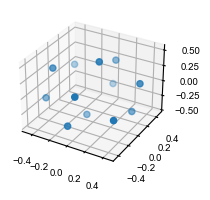

In [39]:
# print comps (loading), and sample representation (score)
print(comps.shape, 
      X_reduced.shape, 
      '\n',comps.reshape(n_components,3,-1), 
      '\n',comps.reshape(n_components,3,-1).sum(axis=2),# sumSx sumSy sumSy on tetrahedron for first 3 PCA ~ 0, 2nd three PCA only one is significant FM
      '\n', X_reduced)

# Plot loadings for the first 3 pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(comps[0,:], comps[1,:], comps[2,:])
plt.show()

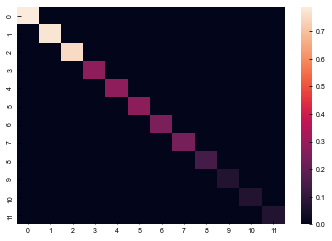

In [60]:
# Correlation matrix for the sorces
corr = np.cov(X_reduced[:,:12].T)
fig, ax = plt.subplots()
ax = sns.heatmap(corr, ax=ax)
plt.show()

In [8]:
# Reconstruct X based on scores and loading
print((X_reduced[:3,0:4]@comps[0:4,:]).reshape(3,3,-1))

[[[-0.42671957  0.4156161   0.10403801 -0.13606117]
  [ 0.03457329  0.39935088 -0.04489467 -0.40435373]
  [ 0.28238304  0.18993487 -0.18008513 -0.27414442]]

 [[-0.88370119  0.86910489  0.27743505 -0.31370518]
  [ 0.3374853   0.40029701 -0.35143203 -0.40872341]
  [ 0.42064471  0.67718525 -0.67220868 -0.40970175]]

 [[ 0.75034078 -0.77449616  0.56204153 -0.64921099]
  [-0.70009103 -0.35348773  0.6856854   0.33980733]
  [-0.33362362  0.02267326  0.02524952  0.34855925]]]


## 2D plots in PCA space and Hist of mod(X_reduced)

In [9]:
# Prepare the axis pairs for 2D plot
import itertools
idx=np.array(list(itertools.combinations(np.arange(6), r=2) ) )
print(idx, idx.shape)

[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]] (15, 2)


In [10]:
%matplotlib ipympl

fig, axes = plt.subplots(3,5)
for i, ax in enumerate(axes.flat):
    ax.set_aspect(aspect=1)
    ax.scatter(X_reduced[:, idx[i,0]], 
               X_reduced[:, idx[i,1]], cmap=plt.cm.Set1, edgecolor='k', s=1,alpha=0.05)
plt.show()

# Plot the modules
modules = ((X_reduced**2).sum(axis=1))**0.5

fig, ax = plt.subplots(1,1)
n, bins, patches = plt.hist(modules, 50, density=True, facecolor='g', alpha=0.75)
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
plt.close('all')

## 3D plot in the space of 3 pca

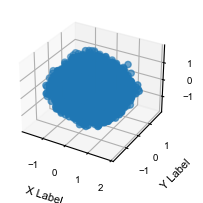

In [9]:
# Plot 3D with Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 3])
ax.scatter(X_reduced[:, 3], X_reduced[:, 4], X_reduced[:, 5])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [35]:
# with mayavi
xyz = X_reduced[:, 0:3].T
#xyz = X_reduced[:, 3:6].T
#xyz = X_reduced[:, 6:9].T
print(xyz.shape)
x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

# Plot scatter with mayavi
# figure = mlab.figure('DensityPlot')
# pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
# #pts = mlab.points3d(comps[0,:]*5, comps[1,:]*5, comps[2,:]*5, color=(0,0,0), scale_mode='none', scale_factor=0.25) # lodading of the first 3 pca
# mlab.axes()
# mlab.show()

(3, 76500)


In [19]:
# with ipyvolume
# xyz = X_reduced[:, 0:3].T
# kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
# density = kde(xyz).reshape([1,-1])

In [11]:
# from matplotlib import cm
# cmap = cm.jet
# color= cmap( (density-density.min()) / density.ptp() )

# x, y, z = np.vsplit(xyz[:8],3)
# fig = ipv.figure()
# ipv.scatter(x, y, z,marker='sphere',color=color[...,:3],size=2)
# ipv.show()

In [7]:
xyz = X_reduced[:, 0:3].T
#xyz = X_reduced[:, 3:6].T
#xyz = X_reduced[:, 6:9].T
print(xyz.shape)
x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

(3, 76500)


In [23]:
import plotly.graph_objects as go
import numpy as np

# layout = go.Layout(
#    xaxis = dict(
#       title = 'X',
#       showticklabels = True
#    ),
#    yaxis = dict(
#       #title = 'VALUE',
#       titlefont = dict(
#          family = 'Arial, sans-serif',
#          size = 50,
#          color = 'lightgrey'
#       ),
#       showticklabels = True,
#       tickfont = dict(
#          family = 'Old Standard TT, serif',
#          size = 500,
#          color = 'black'),
#       tickmode = 'linear',
#       tick0 = 0.0,
#       dtick = 0.25
#    )
# ) # unused!!!

# The cross section of x+y+z=0
mask = np.sum(xyz, axis=0)<0
fig = go.Figure(data=[go.Scatter3d(x=np.squeeze(x)[mask], y=np.squeeze(y)[mask], z=np.squeeze(z)[mask],
                                   mode='markers',
                                   marker=dict(size=2,
                                               color=np.squeeze((density-density.min()) / density.ptp())[mask], # set color to an array/list of desired values
                                               colorscale='magma',   # choose a colorscale
                                               colorbar=dict(title='Normalized density',titleside='right',
                                                             x=0.9,y=0.4,
                                                             len=0.7, thickness=20))
                                  )
                     ]
               )

camera = dict(
    eye=dict(x=1, y=1, z=1)
)
fig.update_layout(
   autosize=False,
   width=800,
   height=800,
   scene_camera=camera,
   scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )


# All data
fig = go.Figure(data=[go.Scatter3d(x=np.squeeze(x), y=np.squeeze(y), z=np.squeeze(z),
                                   mode='markers',
                                   marker=dict(size=2,
                                               color=np.squeeze((density-density.min()) / density.ptp()), # set color to an array/list of desired values
                                               colorscale='magma',   # choose a colorscale
                                               colorbar=dict(title='Normalized density',titleside='right',
                                                             x=0.9,y=0.4,
                                                             len=0.7, thickness=20))
                                  )
                     ]
               )

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    scene = dict(xaxis_title='1st PC',
                 yaxis_title='2nd PC',
                 zaxis_title='3rd PC'),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=10),
    paper_bgcolor="White",
    font=dict(size=15)
)
#fig.write_image(filepath+"fig1.pdf") # it hangs
fig.show()


In [14]:
fig.write_image(filepath+"fig100.pdf")

In [28]:
print(filepath)

D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/


# KMeans clustering

## Test nb of clusters

In [6]:
# use Kmeans to find the center of the preferred space
from sklearn.cluster import KMeans

# 3D space
xyz = X_reduced[:, 0:3].T
#xyz = X_reduced[:, 3:6].T
x, y, z = np.vsplit(xyz,3)
# determine n_cluster
n_clusters = np.array([1,2,3,4,5,6,7,8,9,10,12,15,20])
n_clusters = np.array([1,2,3,4,5,6,7,8,9,10,12,15,20])

inertias = np.zeros_like(n_clusters)
for idx, i in enumerate(n_clusters):
    estimator = KMeans(n_clusters=i, n_init='auto')
    estimator.fit(xyz.T)
    inertias[idx] = estimator.inertia_

In [116]:
# 4D space
xyz = X_reduced[:, 0:4].T
#xyz = X_reduced[:, 3:6].T
x, y, z, k = np.vsplit(xyz,4)
# determine n_cluster
n_clusters = np.array([1,2,3,4,5,6,7,8,9,10,12,15,20])
n_clusters = np.array([1,2,3,4,5,6,7,8,9,10,12,15,20])

inertias = np.zeros_like(n_clusters)
for idx, i in enumerate(n_clusters):
    estimator = KMeans(n_clusters=i, n_init='auto')
    estimator.fit(xyz.T)
    inertias[idx] = estimator.inertia_

In [16]:
filepath

'D:\\2_neutron_scattering\\0_SpinVert\\gdhfo_d7\\35mK/'

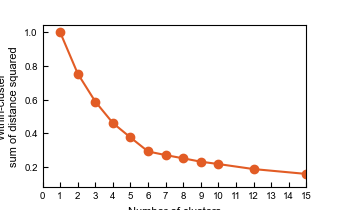

In [19]:
plt.figure()
plt.plot(n_clusters, inertias/np.max(inertias),'o-',c='#E25C25')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster\nsum of distance squared')
plt.xlim([0,15])
plt.savefig(filepath+'kmean_nb.pdf',bbox_inches="tight",pad_inches=0.01)
plt.show()

## Use n_clusters = 6

In [30]:
%matplotlib ipympl
estimator = KMeans(n_clusters=6)
xyz = X_reduced[:, 0:3].T
x, y, z = np.vsplit(xyz,3)
estimator.fit(xyz.T)
labels = estimator.labels_
print(labels)

c:\Users\jhxup\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 4 1 ... 0 2 1]


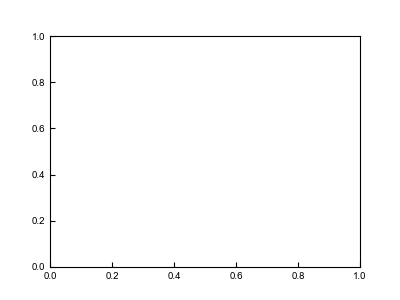

In [119]:
fig, ax = plt.subplots(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#estimator.fit(xyz.T, init=[[1,1,1],[-1,1,1],[-1,-1,1],[-1,-1,-1],[],[]])
ax.scatter(x, y, z, c=labels.astype(float), edgecolor=None,s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [68]:
print(estimator.labels_,'\n',
      estimator.labels_.shape,'\n',
      estimator.cluster_centers_,'\n',
      np.diff(estimator.cluster_centers_,axis=0),'\n',
      estimator.inertia_)

[5 5 3 ... 2 4 3] 
 (61200,) 
 [[ 0.08902272 -1.06331781 -0.70441187]
 [ 0.85885564  0.58259492 -0.7420791 ]
 [ 0.95750569 -0.42724458  0.74468572]
 [-0.87903521 -0.59113674  0.73554761]
 [-0.95937188  0.42716785 -0.7254351 ]
 [-0.09304764  1.06166837  0.71626202]] 
 [[ 0.76983292  1.64591273 -0.03766723]
 [ 0.09865005 -1.0098395   1.48676482]
 [-1.8365409  -0.16389216 -0.00913811]
 [-0.08033666  1.01830459 -1.46098271]
 [ 0.86632424  0.63450052  1.44169712]] 
 41231.287577961775


## Reconstruct X based on scores and loading and print eigen vec

In [120]:
# 6: nb of clusters, 3: first 3 pca
#print(pca.mean_)
spins_at_centers = (estimator.cluster_centers_@comps[0:3,:] + pca.mean_).reshape(6,3,-1) #in the original space
print(np.round(spins_at_centers,decimals=2))

normed = spins_at_centers/np.broadcast_to(
    np.absolute(spins_at_centers).max(axis=1).reshape(6,1,-1),(6,3,4))# 16 for uc, 4 for tetra
#print(normed)
print(repr(np.round(normed).astype(int)))

# test = comps[3,:].reshape(3,-1) #Check the 3rd pc for uc
# normed = test/np.broadcast_to(
#     np.absolute(test).max(axis=0).reshape(1,-1),(3,16))# 16 for uc, 4 for tetra
# print(repr(np.round(normed).astype(int)))

[[[-0.43  0.43 -0.41  0.41]
  [ 0.39  0.42 -0.39 -0.42]
  [-0.02  0.02 -0.03  0.02]]

 [[-0.02  0.01 -0.02  0.03]
  [ 0.4  -0.41 -0.38  0.39]
  [-0.43  0.44 -0.45  0.44]]

 [[-0.01  0.01 -0.01  0.01]
  [-0.45  0.43  0.44 -0.41]
  [ 0.39 -0.4   0.42 -0.41]]

 [[ 0.41 -0.41 -0.45  0.45]
  [-0.02  0.03  0.01 -0.02]
  [-0.42 -0.4   0.41  0.41]]

 [[ 0.41 -0.42  0.39 -0.38]
  [-0.44 -0.42  0.44  0.42]
  [-0.03  0.02 -0.02  0.03]]

 [[-0.44  0.43  0.42 -0.42]
  [-0.05 -0.01  0.06 -0.  ]
  [ 0.4   0.42 -0.44 -0.39]]]
array([[[-1,  1, -1,  1],
        [ 1,  1, -1, -1],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 1, -1, -1,  1],
        [-1,  1, -1,  1]],

       [[ 0,  0,  0,  0],
        [-1,  1,  1, -1],
        [ 1, -1,  1, -1]],

       [[ 1, -1, -1,  1],
        [ 0,  0,  0,  0],
        [-1, -1,  1,  1]],

       [[ 1, -1,  1, -1],
        [-1, -1,  1,  1],
        [ 0,  0,  0,  0]],

       [[-1,  1,  1, -1],
        [ 0,  0,  0,  0],
        [ 1,  1, -1, -1]]])


## Save color diamond lattice

In [51]:
# Try calc chirality
normed_r = np.round(normed)
for i in range(6):
    temp = []
    for j in [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
        temp.append( np.cross(normed_r[i,:,j[0]], normed_r[i,:,j[1]]) )
    print(np.reshape(temp,[6,3]))

[[ 0.  0.  0.]
 [-2.  0. -0.]
 [ 2.  0.  0.]
 [ 2.  0.  0.]
 [-2.  0. -0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [-2.  0. -0.]
 [ 2.  0.  0.]
 [ 2.  0.  0.]
 [-2.  0. -0.]
 [ 0.  0.  0.]]
[[ 0.  2. -0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  2. -0.]
 [ 0.  0.  0.]
 [ 0.  2. -0.]]
[[ 0.  0. -2.]
 [-0.  0.  2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -2.]
 [-0.  0.  2.]]
[[ 0.  2.  0.]
 [ 0.  0.  0.]
 [ 0. -2. -0.]
 [ 0.  2.  0.]
 [ 0.  0.  0.]
 [ 0.  2.  0.]]
[[ 0.  0. -2.]
 [-0.  0.  2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -2.]
 [-0.  0.  2.]]


In [38]:
# define order director which is the norm of the plane of the coplanar PC porder
normed_r = np.round(normed)
pc_director =np.array([np.array([1,1,1])-item for item in np.abs(normed_r[:,:,0])])
unq, count = np.unique(pc_director, axis=0, return_counts=True)
repeated_groups = unq[count > 1]

print(pc_director)
for repeated_group in repeated_groups:
    repeated_idx = np.argwhere(np.all(pc_director == repeated_group, axis=1)).astype(int)
    #print(repeated_idx.ravel())
    pc_director[repeated_idx[1]] = -pc_director[repeated_idx[1]]
print(pc_director)   


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [-0. -0. -1.]
 [-1. -0. -0.]
 [-0. -1. -0.]]


In [40]:
# Stack [Sx,Sy,Sy] to diamond_part
diamond_part[:,0] = diamond_part[:,0] +1 # change the atom index in a unit cell starting from 1 (previously 0)
diamond_part = np.hstack( [diamond_part, np.zeros([diamond_part.shape[0],3])] )

In [46]:
# Hard reduction: Six domain space 
for i in range(6):
    mask = (estimator.labels_ == i)
    diamond_part[mask,4:7] = (pc_director[i,:])
diamond_part.shape

(40000, 7)

In [41]:
# Soft reductoin: space formed by the first 3 eigen vectors
row_sums = np.sqrt(np.sum(X_reduced[:, 0:3]**2, axis=1))
diamond_part[:,4:7] = X_reduced[:, 0:3] / row_sums[:, np.newaxis]
diamond_part.shape

(40000, 7)

In [42]:
# The six domains are equally populated
np.abs(diamond_part[:,4:7]).sum(axis=0)

array([20204.38900739, 20247.48586893, 20049.50504228])

In [47]:
# Save
filename_dia='diamond_part_hard_spins_'

nSC, box = 40, [sc-1,sc-1,sc-1]
for i in range(0,nSC,1):
    file = os.path.join(filepath,filename_dia) +"{:02d}".format(i+1)+'.txt'
    ihklS = np.squeeze(diamond_part.reshape([nSC,-1,7])[i,:,:])
    save_spins(file, ihklS, nSites=8, X_Sites=o8b, cell=[10.44,10.44,10.44, 90,90,90], box=box)

Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_01.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_02.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_03.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_04.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_05.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_06.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_07.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_08.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_09.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_10.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK/diamond_part_hard_spins_11.txt
Saved D:\2_neutron_scattering\0_SpinVert\gdhfo_d7\35mK

In [235]:
# Plot the spin configuration at the six centers (box scale do not change)
xyz4 = atpos[orBonds[0:4,1].astype(int),:]
x4, y4, z4 = np.hsplit(xyz4, 3)
# the X aixs does not expand
fig = ipv.figure()
for i in range(6):
    u, v, w = np.hsplit(normed_r[i].T*0.2,3)
    #ipv.scatter(np.squeeze(x)+1, np.squeeze(y), np.squeeze(z),marker='sphere',size=2)
    ipv.quiver(np.squeeze(x4)+i, np.squeeze(y4), np.squeeze(z4), np.squeeze(u), np.squeeze(v), np.squeeze(w), size=10, size_selected=5, color_selected="blue")
ipv.show()

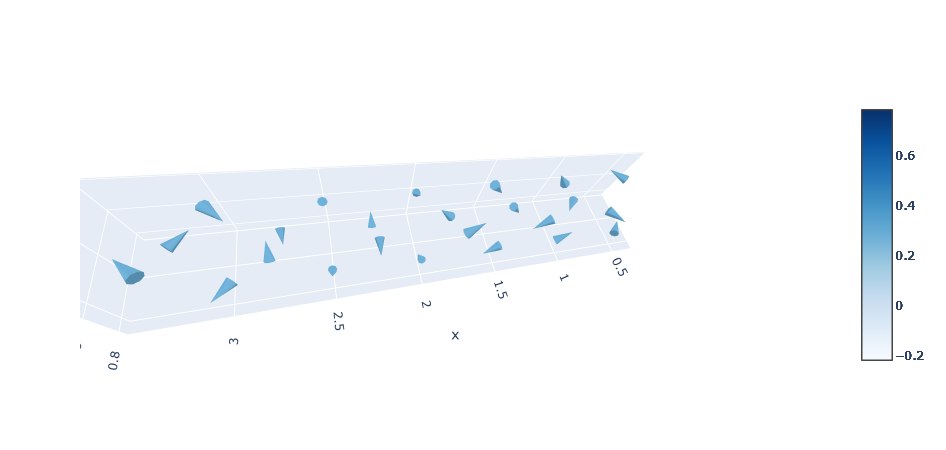

In [237]:
fig = go.Figure()
for i in range(6):
    u, v, w = np.hsplit(normed_r[i].T*0.2,3)
    fig.add_trace(go.Cone(x=np.squeeze(x4)+0.5*i, y=np.squeeze(y4), z=np.squeeze(z4), u=np.squeeze(u), v=np.squeeze(v), w=np.squeeze(w),
                          colorscale='Blues', sizemode="absolute",sizeref=0.1)
                 )

fig.update_layout(scene=dict(aspectratio=dict(x=6, y=1, z=1),
                             camera_eye=dict(x=1.2, y=1.2, z=0.6)))

fig.show()

## Plot different cluster in different color

In [70]:
# with mayavi
# different clusters in different "Color"
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, labels.astype(float).reshape(1,-1), colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
mlab.axes()
mlab.show()

NameError: name 'mlab' is not defined

In [30]:
np.unique(labels.astype(np.float).reshape(1,-1))

array([0., 1., 2., 3., 4., 5.])

In [21]:
# different clusters in different "Colormap"
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])
colors = ['Greys','Greens','Purples','Reds','Oranges','Blues']
for i in np.arange(0,6):
    mask = labels.astype(float).reshape(1,-1) == i
    mlab.points3d(x[mask], y[mask], z[mask], density[mask], colormap=colors[i], scale_mode='none', scale_factor=0.07)
mlab.axes(color=(0,0,0))
mlab.show()

NameError: name 'mlab' is not defined

In [124]:
# Use ipyvolume
ipv.style.use('light')
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
#density = kde(xyz).reshape([1,-1])
colors = ['Greys','Greens','Purples','Reds','Oranges','Blues']
ipv.figure(lighting=False)
for i in np.arange(0,6):
    mask = labels.astype(np.float).reshape(1,-1) == i
    cmap = plt.get_cmap(colors[i])
    color = cmap( (density[mask]-density[mask].min()) / density[mask].ptp() )
    ipv.scatter(x[mask], y[mask], z[mask], color=color[...,:3], marker='sphere')
ipv.show()

In [97]:
ipv.style.use('classic')

In [38]:
print(density.shape)

(76500,)


In [59]:
fig = go.Figure()
colors = ['Greys','Greens','Purples','Reds','Oranges','Blues','Blues']
density = np.squeeze(density)
for i in range(6):        
    mask1 = labels.astype(float).reshape(1,-1) == i
    mask2 = np.sum(xyz, axis=0)<0
    mask = np.squeeze((mask1) & (mask2))

    if i==0:
        print(np.sum(mask))
        fig.add_trace(go.Scatter3d(x=np.squeeze(x)[mask], y=np.squeeze(y)[mask], z=np.squeeze(z)[mask],mode='markers', 
                                marker=dict(size=2,
                                                color=np.squeeze( (density[mask]-density[mask].min()) / density[mask].ptp() ), # set color to an array/list of desired values
                                                colorscale=colors[i],  # choose a colorscale
                                                #colorbar=dict(title='Normalized density',titleside='right',x=0.9,y=0.4,len=0.7, thickness=20)
                                                )
                                    )
                    )
    if i in [1,2,3,5]: # cluster 4 is masked out, giving zero lenght for color scale and error
        print(np.sum(mask))
        fig.add_trace(go.Scatter3d(x=np.squeeze(x)[mask], y=np.squeeze(y)[mask], z=np.squeeze(z)[mask],mode='markers', 
                                marker=dict(size=2,
                                            color=np.squeeze( (density[mask]-density[mask].min()) / density[mask].ptp() ), # set color to an array/list of desired values
                                            colorscale=colors[i]  # choose a colorscale
                                            )
                                )
                    )
    

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=10),
    paper_bgcolor="White",
    font=dict(size=16),
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
)

fig.show()

12164
8218
704
12657
4527


In [55]:
fig = go.Figure()
colors = ['Greys','Greens','Purples','Reds','Oranges','Blues','Blues']
for i in range(6):        
    mask = labels.astype(float).reshape(1,-1) == i
    mask1 = np.sum(xyz, axis=0)<0
    if i==0:
        fig.add_trace(go.Scatter3d(x=np.squeeze(x[mask])[mask1], y=np.squeeze(y[mask])[mask1], z=np.squeeze(z[mask])[mask1],mode='markers', 
                                marker=dict(size=2,
                                                color=np.squeeze( (density[mask]-density[mask].min()) / density[mask].ptp() ), # set color to an array/list of desired values
                                                colorscale=colors[i],  # choose a colorscale
                                                colorbar=dict(title='Normalized density',titleside='right',x=0.9,y=0.4,len=0.7, thickness=20)
                                                )
                                    )
                    )
    
    fig.add_trace(go.Scatter3d(x=np.squeeze(x[mask])[mask1], y=np.squeeze(y[mask])[mask1], z=np.squeeze(z[mask])[mask1],mode='markers', 
                            marker=dict(size=2,
                                        color=np.squeeze( (density[mask]-density[mask].min()) / density[mask].ptp() ), # set color to an array/list of desired values
                                        colorscale=colors[i]  # choose a colorscale
                                        )
                              )
                )
    

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    scene = dict(xaxis_title='1st PC',
                 yaxis_title='2nd PC',
                 zaxis_title='3rd PC'),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=10),
    paper_bgcolor="White",
    font=dict(size=16)
)

fig.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12790 but corresponding boolean dimension is 76500

In [241]:
fig.write_html(os.path.join(filepath, "cluster_colorful.html"))

# Manual polynomical features and linear PCA

In [180]:
# Test generating (1...,sqrt2,...) for applying to monominals to mimic the (X.T.dot(Y))**2 for quadratic Kernel
poly = PolynomialFeatures(2, include_bias=False)
print(poly.fit_transform([[1,2,3]]) )

comb = np.array(list(itertools.combinations_with_replacement([1,2,3], r=2) ) )
print(comb)
np.where(comb[:,0]!=comb[:,1],np.sqrt(2),1)

[[1. 2. 3. 1. 2. 3. 4. 6. 9.]]
[[1 1]
 [1 2]
 [1 3]
 [2 2]
 [2 3]
 [3 3]]


array([1.        , 1.41421356, 1.41421356, 1.        , 1.41421356,
       1.        ])

In [212]:
X = spins[:,:]
poly = PolynomialFeatures(2, include_bias=False)
X = poly.fit_transform(X)

nb_of_atoms_per_cluster = 16
X = X[:,nb_of_atoms_per_cluster*3:]# without the first order monominials

# Apply the sqrt2 coefficients for the cross terms to mimic the qudratic kernel
comb = np.array( list(itertools.combinations_with_replacement(np.arange(12), r=2) ) )
sqrt2 = np.where(comb[:,0]!=comb[:,1],np.sqrt(2), 1)
#X = X * sqrt2 

# Check how many combinations it should be
from math import factorial
def nAr(n, k):
    '''
    return the number of ordered permutations of
    k items taken from a population of size n
    uses algorithm n!/(n-k)!
    '''
    return factorial(n)/factorial(n-k)

def nCr(n, k):
    """
    Choose k elements from a set of n elements - n must be larger than or equal to k
    :param n: int
    :param k: int
    :rtype: int
    """
    return factorial(n)/(factorial(k)*factorial(n-k))

print(X.shape, nAr(12,2),nCr(12,2)+12)

(3200, 1176) 132.0 78.0


In [213]:
n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X)

print(pca.explained_variance_ratio_,
      np.sum(pca.explained_variance_ratio_) )

print(pca.singular_values_)

X_reduced = pca.transform(X)
comps = pca.components_
print(pca.mean_)
plt.figure(figsize=(5,4))
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'o')
plt.xlabel(r'i of $\lambda$')
plt.ylabel('Explained var')
plt.show()

[0.0198134  0.01862343 0.01718686 0.01600137 0.01538014 0.01483691
 0.01418631 0.01351965 0.01138801 0.00858272 0.00845178 0.00824094] 0.16621152802658312
[88.4829004  85.78465448 82.40965482 79.51671548 77.95788104 76.56875386
 74.87115355 73.09076113 67.081658   58.23610309 57.7901789  57.06479638]
[0.32779243 0.11081957 0.03108546 ... 0.33074938 0.03756724 0.33751996]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [163]:
# print comps (loading), and sample representation (score)
print(comps.shape, 
      X_reduced.shape, 
      '\n',comps,
      '\n', X_reduced)

# # Plot loadings for the first 3 pca
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(comps[2,:], comps[3,:], comps[4,:])
# plt.show()

(12, 78) (7650, 12) 
 [[-5.88619601e-02  9.20950487e-02  6.50045354e-03 -3.92708710e-02
   4.31073105e-02  7.63009319e-02 -5.62034238e-02 -6.41570013e-02
   7.05732091e-02  7.68172732e-02 -6.12233275e-02 -8.76336710e-02
  -6.22974564e-02 -4.25745508e-02  1.26849436e-02 -5.86150149e-02
  -5.32866241e-02  4.66958413e-02  6.63716324e-02 -7.99444889e-02
  -6.55668350e-02  8.26374628e-02  6.43381508e-02 -5.91630458e-02
   9.50139103e-02  6.85986099e-02  3.57851765e-02 -5.35618601e-02
  -4.98768533e-02 -7.79683457e-02 -7.76312962e-02  6.04207440e-02
   9.43712236e-02 -6.84650549e-02 -5.35834117e-02 -5.79593819e-02
   6.34441721e-02  4.68650377e-02  8.73688218e-02  6.61303278e-02
  -8.16142611e-02 -7.10969714e-02  3.31050565e-02 -2.22267403e-01
  -5.66900767e-02  2.45914698e-01 -1.18812937e-01  1.22743635e-01
  -1.52561489e-01  1.49422388e-01  3.53019777e-02  2.46210766e-01
  -5.97488733e-02  1.13199690e-01 -1.22384569e-01  1.62993613e-01
  -1.52093049e-01  3.29889791e-02 -2.23157835e-01  1.5

In [197]:
print(comps.shape, 
      X_reduced.shape, 
      '\n',comps[0,:],
      '\n', X_reduced)
print(X_reduced[:,0], comps[0,:])

(12, 2652) (3200, 12) 
 [ 0.00689411 -0.0006454   0.00486905 ...  0.09773616  0.01071735
  0.09795838] 
 [[ 1.64271332e+00 -2.97769791e+00  2.04329405e-01 ... -2.22415619e+00
  -4.65830631e-01 -2.93186446e+00]
 [ 1.89966723e+00  3.27140493e+00 -5.32329243e-01 ...  7.08439330e-01
   1.06105688e+00  6.49093969e-01]
 [ 1.06380588e+00 -1.21103515e+00 -1.00989848e-01 ...  2.23016519e+00
   1.12824541e+00 -3.13518945e-01]
 ...
 [-2.15903380e+00  5.20067005e-03  5.44270923e-03 ...  5.75059433e-03
  -1.64941264e-03 -3.98464619e-02]
 [-2.15903380e+00  5.20067005e-03  5.44270923e-03 ...  5.75059433e-03
  -1.64941264e-03 -3.98464619e-02]
 [-2.15903380e+00  5.20067005e-03  5.44270923e-03 ...  5.75059433e-03
  -1.64941264e-03 -3.98464619e-02]]
[ 1.64271332  1.89966723  1.06380588 ... -2.1590338  -2.1590338
 -2.1590338 ] [ 0.00689411 -0.0006454   0.00486905 ...  0.09773616  0.01071735
  0.09795838]


## 2D plots in PCA space and Hist of mod(X_reduced)

In [215]:
# pairewise axis for plotting
idx=np.array(list(itertools.combinations(np.arange(5), r=2) ) )
print(idx, idx.shape)

[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 2]
 [1 3]
 [1 4]
 [2 3]
 [2 4]
 [3 4]] (10, 2)


In [216]:
# The first five pca: 0 1 2 3 4
fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.flat):
    ax.set_aspect(aspect=1)
    ax.scatter(X_reduced[:, idx[i,0]], 
               X_reduced[:, idx[i,1]], cmap=plt.cm.Set1, edgecolor='k', s=1,alpha=0.1)
    ax.text(0.8,0.9,idx[i,:])
plt.show()

# Plot the modules
modules = ((X_reduced**2).sum(axis=1))**0.5

fig, ax = plt.subplots(1,1)
n, bins, patches = plt.hist(modules, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

# Plot hist
fig, ax = plt.subplots(1,1)
n, bins, patches = plt.hist(X_reduced[:, 1], 50, density=True, facecolor='g', alpha=0.75)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## 3D plots in the space of fisrt 3 PCA

In [162]:
# with mayavi
xyz = X_reduced[:, 2:5].T
#xyz = X_reduced[:, 3:6].T
print(xyz.shape)
x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
#pts = mlab.points3d(comps[0,:]*5, comps[1,:]*5, comps[2,:]*5, color=(0,0,0), scale_mode='none', scale_factor=0.25) # lodading of the first 3 pca
mlab.axes()
mlab.show()

(3, 7650)


# Kernel PCA (quratic kernel)

In [218]:
X = spins[:2000,:]
n_components=20
kpca = KernelPCA(kernel="poly", degree=2, n_components=n_components, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)

print(kpca.lambdas_,
      np.sum(kpca.lambdas_) )

plt.figure(figsize=(5,4))
plt.plot(np.arange(len(kpca.lambdas_)), kpca.lambdas_,'o')
plt.xlabel(r'i')
plt.ylabel(r'$\lambda_i$')
plt.show()

[145.59139772 140.78073577 125.1374607  102.84358035  52.08016142
  50.51525325  47.81915932  45.60737564  43.02089669  37.15850253
  36.0441485   35.44112989  25.44857249  23.80141563  23.15078886
  22.30307639  21.21779637  20.52851619  20.27746285  20.09810855] 1038.8655391033815


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [127]:
comps = kpca.alphas_.T
print(comps.shape)

(20, 2000)


In [74]:
print(X[0,:],'\n',
      comps[0,:])

[ 0.01843025  0.2288428  -0.65647544  0.45652352  0.98154976  0.91240868
 -0.58609409 -0.83905601  0.19031656 -0.33932489  0.4749039  -0.29592445] 
 [-0.0005958   0.00776469  0.00034668 ... -0.00694413  0.01729445
  0.01191545]


## 2D plot

In [219]:
fig, axes = plt.subplots(1,3)

colors = np.arange(5)
# The first three pca: 0 1 2
idx = np.array([[0,1],
                [0,2],
                [1,2]])

# The second three pca: 3 4 5
# idx = np.array([[0,1],
#                 [0,2],
#                 [1,2]])+3

for i, ax in enumerate(axes.flat):
    ax.set_aspect(aspect=1)
    ax.scatter(X_kpca[:, idx[i,0]], 
               X_kpca[:, idx[i,1]], cmap=plt.cm.Set1, edgecolor='k', s=1)

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

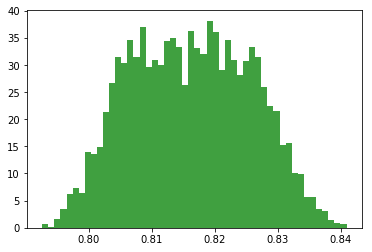

In [17]:
# Plot the modules
modules = ((X_kpca**2).sum(axis=1))**0.5

fig, ax = plt.subplots(1,1)
n, bins, patches = plt.hist(modules, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [170]:
# with mayavi
xyz = X_kpca[:, 0:3].T
xyz = X_kpca[:, 3:6].T
print(xyz.shape)
x, y, z = np.vsplit(xyz,3)
kde = stats.gaussian_kde(xyz) # this fun only accept 3 by x array
density = kde(xyz).reshape([1,-1])

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, colormap='Reds', scale_mode='none', scale_factor=0.07) #x,y,z, density should have the save shape 1byn or nby1
#pts = mlab.points3d(comps[0,:]*5, comps[1,:]*5, comps[2,:]*5, color=(0,0,0), scale_mode='none', scale_factor=0.25) # lodading of the first 3 pca
mlab.axes()
mlab.show()

(3, 2000)


# Compare maunual maping and kPCA
1. Manually generated ploynominial features: two new pca
2. Quadratic kernel: simiar to linear PCA

Why

# Autoencoder